In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate

In [2]:
data = pd.read_csv('../data/tracks_with_binary_target.csv')
data.set_index('title', inplace=True)
data.head()

,artist,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
title,,,,,,,,,,,,,,,
"Hey, Soul Sister",Train,3.693075,78,2010,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83,0
Love The Way You Lie,Eminem,44.814807,94,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82,0
TiK ToK,Kesha,6.410236,81,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80,1
Bad Romance,Lady Gaga,17.680180,89,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79,1
Just the Way You Are,Bruno Mars,31.020064,93,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78,0


In [3]:
features = data.columns.drop(['is_dance_pop'])
labels = ['is_dance_pop']

In [4]:
X = data[features]
Y = data[labels]

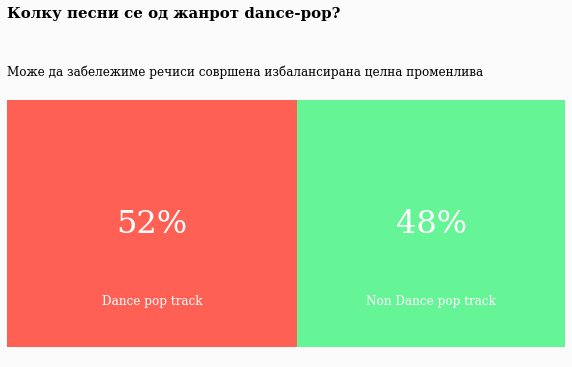

In [5]:
x=data.groupby(['is_dance_pop'])['is_dance_pop'].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(10, 5))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], 
        color='#ff4f42', alpha=0.9, label='Dance pop track')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], 
        color='#56f58b', alpha=0.9, label='Non Dance pop track')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", 
                   xy=(ratio[1.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Dance pop track", 
                   xy=(ratio[1.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Non Dance pop track", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.075,'Колку песни се од жанрот dance-pop?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'Може да забележиме речиси совршена избалансирана целна променлива',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

<p>Кодирање на категорични карактеристики бидејќи стеблата за одлучување и случајниот шум не можат да работат со ненумерички податоци.</p>

In [6]:
encoder =  LabelEncoder()
X['artist'] = encoder.fit_transform(X['artist'])
X.head()

<ipython-input-6-073680b1ef52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['artist'] = encoder.fit_transform(X['artist'])


,artist,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity
title,,,,,,,,,,,,,,
"Hey, Soul Sister",200,3.693075,78,2010,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83
Love The Way You Lie,58,44.814807,94,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82
TiK ToK,103,6.410236,81,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80
Bad Romance,108,17.680180,89,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79
Just the Way You Are,26,31.020064,93,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78


Јас користам енкодер за етикети за да ги кодирам артистите бидејќи има многу уникатни вредности, па поради тоа OneHot кодирањето нема да биде соодветно.

<h1>1. Класификатор - Дрво на одлука</h1>

<h3>1.1 Training with train and test set 80% - 20%</h3>

<p>Скалирање на вредностите, иако тоа нема ефект врз алгоритмите базирани на дрвото на одлука</p>

In [7]:
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = pd.DataFrame(scaler.transform(X))

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4)

In [9]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image  

dot_data = export_graphviz(dt_clf, out_file=None, feature_names=features,
                           class_names = labels[0],
                           filled = True, rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('../data/spotify_tracks')

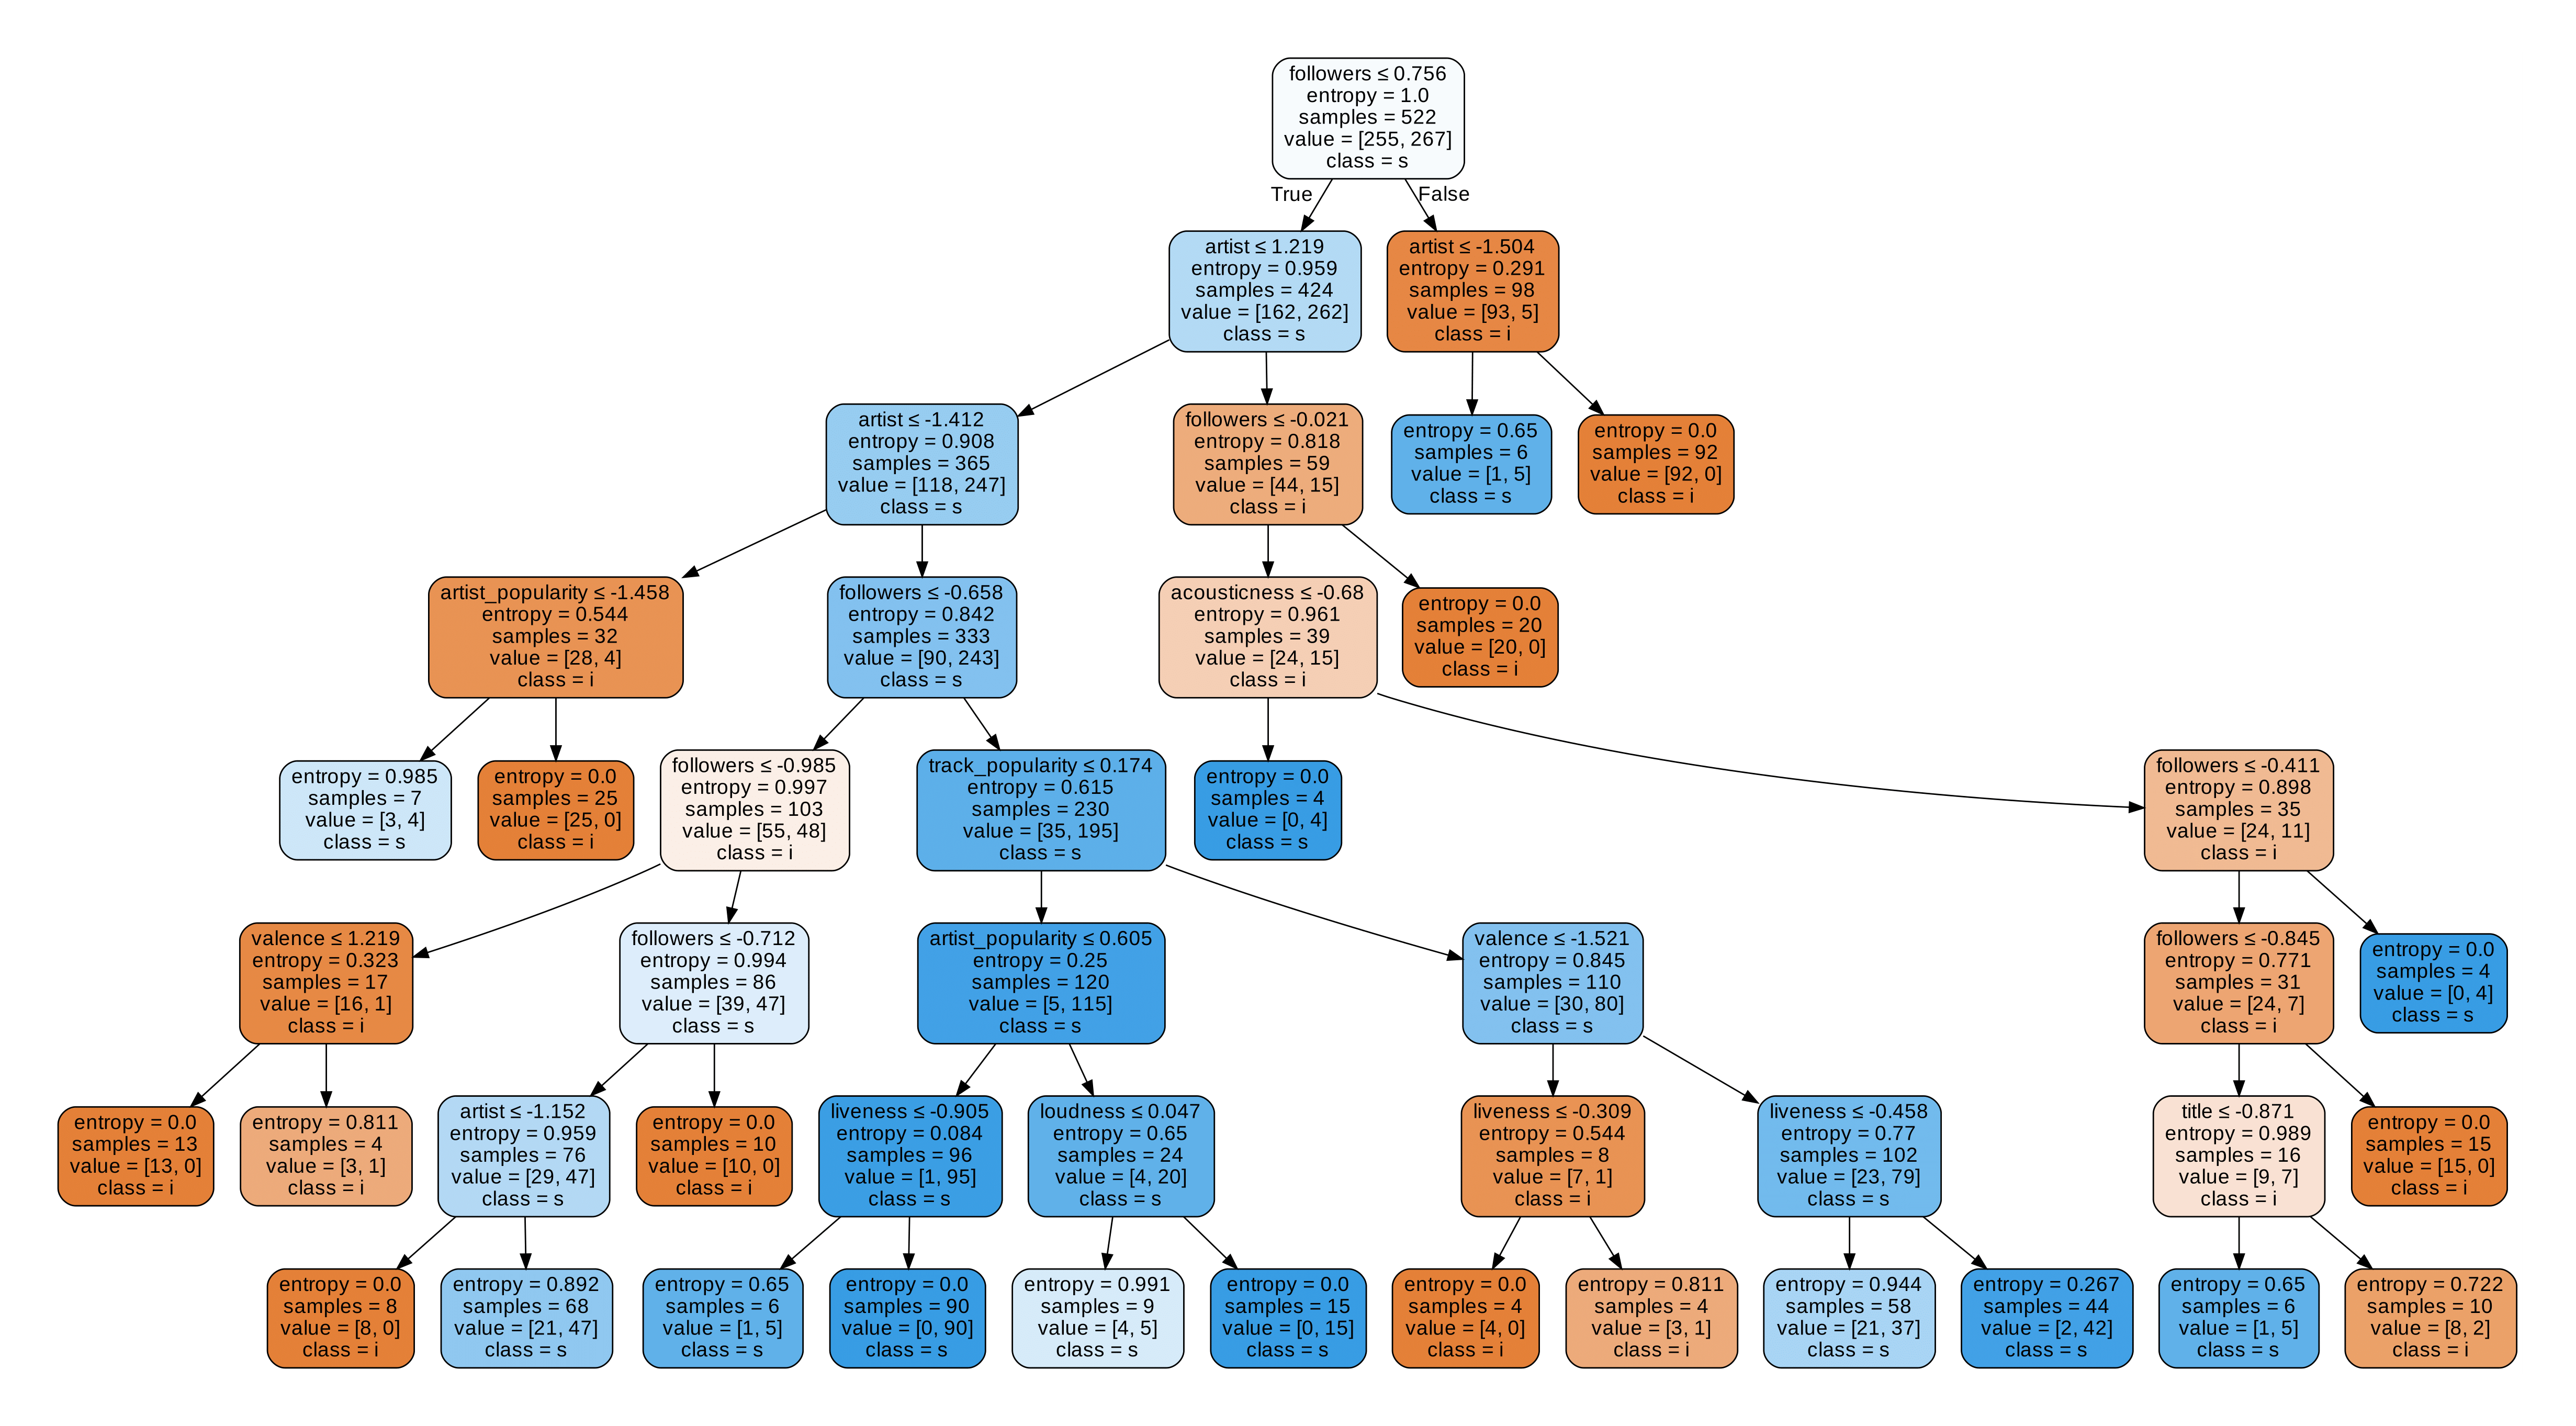

In [10]:
y_pred = dt_clf.predict(X_test)

In [11]:
dt_clf.feature_importances_

array([0.28953243, 0.42307658, 0.03988084, 0.08751622, 0.        ,
       0.        , 0.0484625 , 0.        , 0.        , 0.01071388,
       0.02165748, 0.01683241, 0.        , 0.06232767])

In [12]:
x_plot = np.arange(1, len(dt_clf.feature_importances_) + 1)

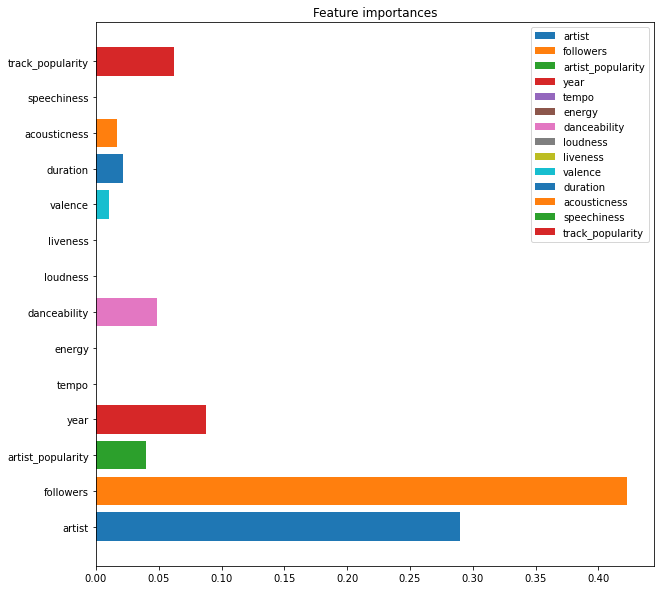

In [13]:
plt.figure(figsize=(10,10))
for i, feat in enumerate(dt_clf.feature_importances_):
  plt.barh(i+1, feat, label=features.to_list()[i])

plt.yticks(x_plot, features.to_list())
plt.title('Feature importances')
plt.legend()
plt.show()

Од горенаведениот график, можеме да видиме дека дрвото на единствена одлука носи најголем дел од својата одлука врз основа на бројот на следбеници на уметникот, самиот уметник, потоа годината и популарноста итн...

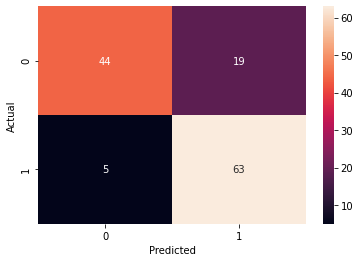

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, plot_roc_curve

conf_mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.816793893129771
Recall: 0.9264705882352942
Precision: 0.7682926829268293
F1 score: 0.84


Матрицата за конфузија и сите оценки покажуваат дека дрвото на единечна одлука има значително добри перформанси на податоците за задржување. Но, овие резултати може малку да се променат, поради случајноста на поделбата на train set и test set.

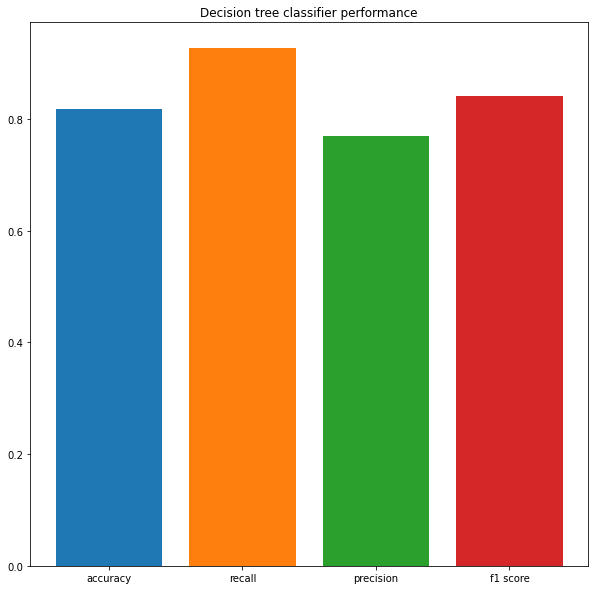

In [16]:
plt.figure(figsize=(10,10))
plt.bar(1, accuracy)
plt.bar(2, recall)
plt.bar(3, precision)
plt.bar(4, f1)
plt.xticks([1,2,3,4], ['accuracy', 'recall', 'precision', 'f1 score'])
plt.title('Decision tree classifier performance')
plt.show()

Accuracy, recall, precision и f1 score се приближно многу блиску.Ова е карактеристика на избалансирано податочно множество.

<Figure size 720x720 with 0 Axes>

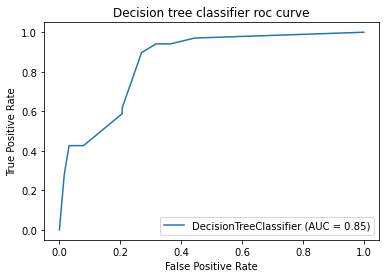

In [17]:
plt.figure(figsize=(10,10))
plot_roc_curve(dt_clf, X_test, Y_test)
plt.title('Decision tree classifier roc curve')
plt.show()

ROC кривата изнесува 0,85 што е задоволителен резултат имајќи предвид дека дрвото на одлуки не е оптимизирано на било кој начин.


<h3>1.2 Вкрстена валидација</h3>

Сега,го оценувам истиот модел користејќи 5-кратна вкрстена валидација.

In [18]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=5, shuffle=True)

In [19]:
def cross_validation_predictions(X, Y, estimator):
    predicted = []
    actual = []

    for train_ind, test_ind in folds.split(X):
      X_train = X.iloc[train_ind]
      Y_train = Y.iloc[train_ind]
      X_test = X.iloc[test_ind]
      Y_test = Y.iloc[test_ind]
      estimator.fit(X_train, Y_train)
      predicted_vals = estimator.predict(X_test)
      predicted.extend(predicted_vals)
      actual.extend(Y_test['is_dance_pop'].to_list())
    return predicted, actual

In [20]:
predicted, actual = cross_validation_predictions(X, Y, dt_clf)

In [21]:
result = pd.DataFrame({'actual': actual, 'predicted':predicted})
result

,actual,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,1
...,...,...
647,0,0
648,0,0
649,0,0
650,0,1


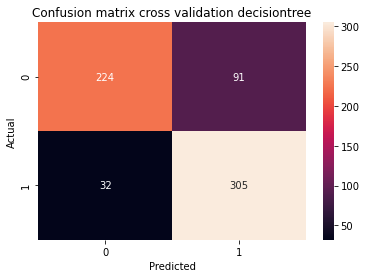

In [22]:
conf_mat = pd.crosstab(result['actual'], result['predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_mat, fmt = '.5g', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix cross validation decisiontree')
plt.show()

Матрицата за конфузија е пропорционално слична на матрицата за конфузија на методот на задржување.Ова се очекува бидејќи множеството податоци има избалансирана бинарна цел.

In [23]:
accuracy = accuracy_score(actual, predicted)
recall = recall_score(actual, predicted)
precision = precision_score(actual, predicted)
f1 = f1_score(actual, predicted)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.8113496932515337
Recall: 0.9050445103857567
Precision: 0.7702020202020202
F1 score: 0.8321964529331515


F1-score на 5-кратната вкрстена валидација е 0.83, а на методот на задржување беше 0.84 што не е значајна разлика.

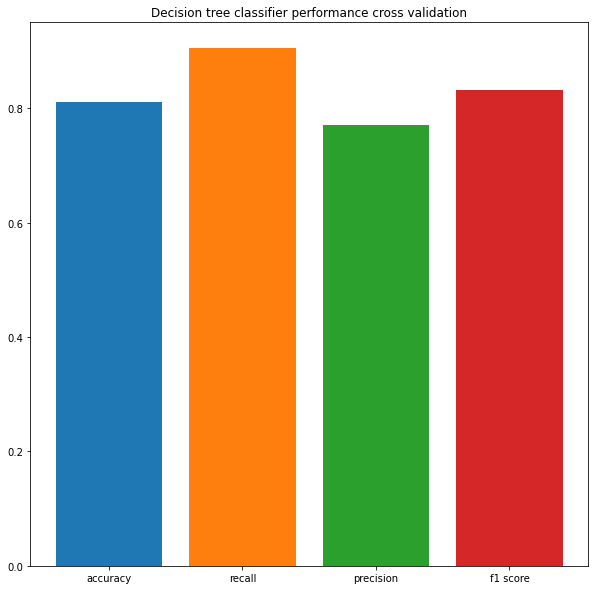

In [24]:
plt.figure(figsize=(10,10))
plt.bar(1, accuracy)
plt.bar(2, recall)
plt.bar(3, precision)
plt.bar(4, f1)
plt.xticks([1,2,3,4], ['accuracy', 'recall', 'precision', 'f1 score'])
plt.title('Decision tree classifier performance cross validation')
plt.show()

<h3>Pruning</h3>

Дрвата на одлучување може лесно да се преклопат со податоците за тестирање. Добра практика е да се обидете да го исечете дрвото,односно да користиме кастрење, за да се намали претренирањето што е можно повеќе.

In [25]:
path = dt_clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

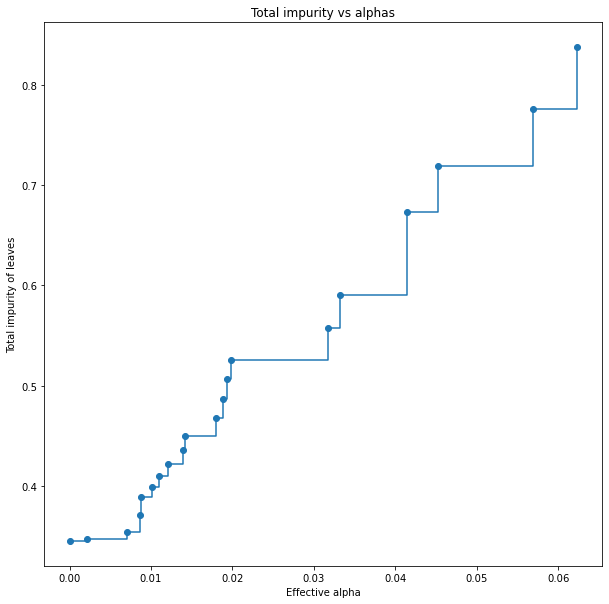

In [26]:
plt.figure(figsize=(10,10))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
plt.xlabel('Effective alpha')
plt.ylabel('Total impurity of leaves')
plt.title('Total impurity vs alphas')
plt.show()

Вредноста на алфата која се користи при кастрење против нечистотијата на листовите покажува сè поголема тенденција.

In [27]:
clfs = []
for alpha in ccp_alphas:
  clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=alpha)
  clf.fit(X_train, Y_train)
  clfs.append(clf)

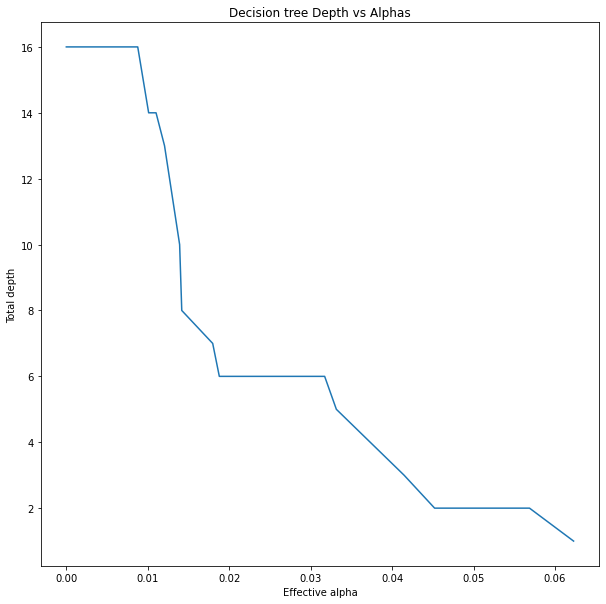

In [28]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,10))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel('Effective alpha')
plt.ylabel('Total depth')
plt.title('Decision tree Depth vs Alphas')
plt.show()

Можеме да забележиме дека колку е поголема алфа, максималната длабочина на стеблото на одлучување се намалува постепено бидејќи стапката на кастрење е зголемена.

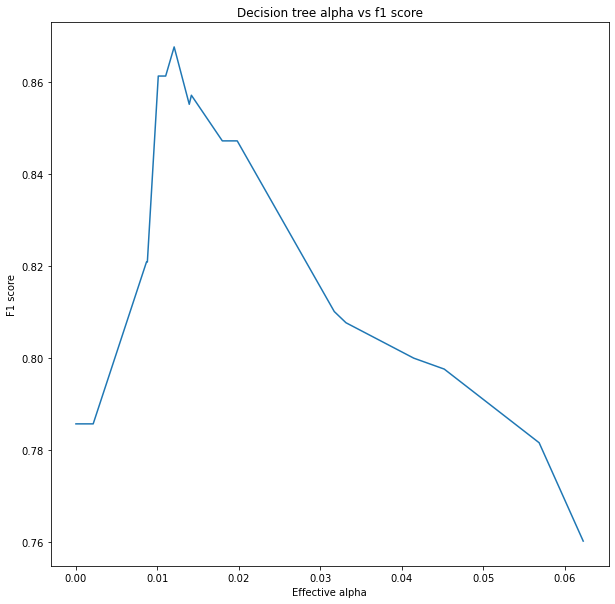

In [29]:
f1_scores = [f1_score(Y_test, clf.predict(X_test)) for clf in clfs]
plt.figure(figsize=(10,10))
plt.plot(ccp_alphas[:-1], f1_scores[:-1])
plt.xlabel('Effective alpha')
plt.ylabel('F1 score')
plt.title('Decision tree alpha vs f1 score')
plt.show()

F1-score на секој модел со различна вредност за алфата ни дава еден глобален врв кој одговара на максималниот f1 резултат. Ова се смета за најдобар модел, а потоа овој модел се оценува со вкрстена валидација за да се споредат оценките со оригиналното неизчистено дрво на одлуки.

In [30]:
max_score = np.max(f1_scores)
chosen_clf = clfs[0]
for i, score in enumerate(f1_scores):
  if score == max_score:
    chosen_clf = clfs[i]

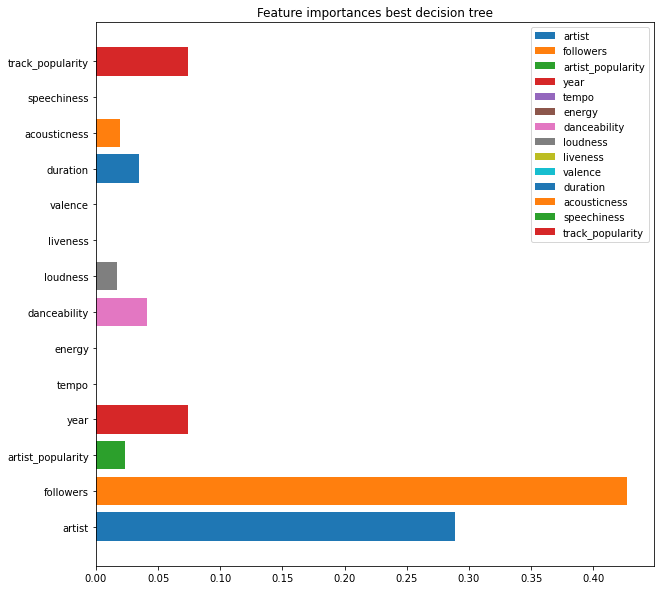

In [31]:
plt.figure(figsize=(10,10))
for i, feat in enumerate(chosen_clf.feature_importances_):
  plt.barh(i+1, feat, label=features.to_list()[i])

plt.yticks(x_plot, features.to_list())
plt.title('Feature importances best decision tree')
plt.legend()
plt.show()

Можеме да забележиме дека важноста на карактеристиките е пропорционална со оригиналното дрво на одлуки. Ова е очекувано бидејќи дрвото на одлуки ги користи најважните карактеристики кон врвот за разделување на податоците, а кастрењето главно влијае на јазлите на помали длабочини.

In [32]:
preds, act = cross_validation_predictions(X, Y, chosen_clf)

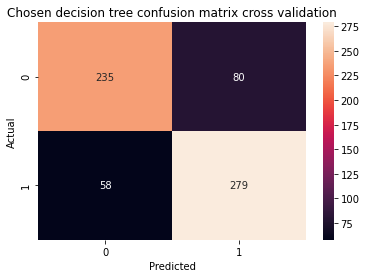

In [33]:
conf_mat = confusion_matrix(act, preds)
sns.heatmap(conf_mat, fmt = '.5g', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Chosen decision tree confusion matrix cross validation')
plt.show()

In [34]:
accuracy = accuracy_score(act, preds)
recall = recall_score(act, preds)
precision = precision_score(act, preds)
f1 = f1_score(act, preds)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.7883435582822086
Recall: 0.827893175074184
Precision: 0.7771587743732591
F1 score: 0.8017241379310345


Кастрираното ,односно изчистеното дрво на одлуки има оценки кои се малку пониски од неизчистеното стебло на одлуки, но има поуниформно предвидување, додека неизчистеното дрво на одлуки беше попристрасно кон предвидување на позитивната класа.

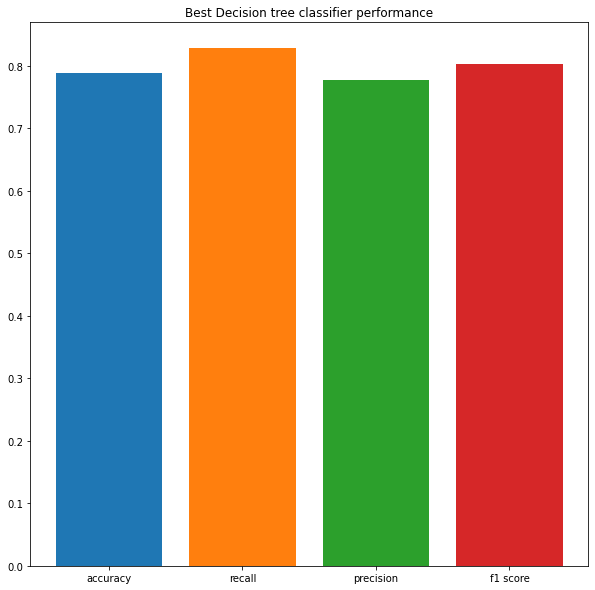

In [35]:
plt.figure(figsize=(10,10))
plt.bar(1, accuracy)
plt.bar(2, recall)
plt.bar(3, precision)
plt.bar(4, f1)
plt.xticks([1,2,3,4], ['accuracy', 'recall', 'precision', 'f1 score'])
plt.title('Best Decision tree classifier performance')
plt.show()

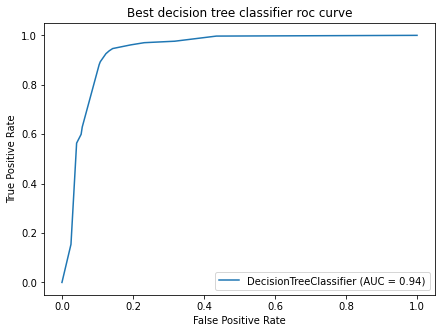

In [36]:
plt.figure(figsize=(7,5))
plot_roc_curve(chosen_clf, X, Y, ax=plt.gca())
plt.title('Best decision tree classifier roc curve')
plt.show()

АUC oценката за кастрираното дрво на одлуки е 0.94 што е значително повисоко отколку за некастрираното дрво, кое има оценка од 0.85.

